In [1]:
import pandas as pd
import glob
import yfinance as yf
import matplotlib.pyplot as plt
ruta = "Datos\DowJones\*.csv"
archivos = glob.glob(ruta)
df = pd.concat((pd.read_csv(archivo) for archivo in archivos), ignore_index=True)
print(df.shape)  
print(df.head())
df.to_csv("Datos/Transformados/csv_unificado.csv", index=False)

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\PORTATIL\AppData\Local\Temp\ipykernel_19188\2483942643.py:5: SyntaxWarning: invalid escape sequence '\D'
  ruta = "Datos\DowJones\*.csv"


(5577723, 9)
      open    high      low  last    close  volume                      date  \
0  213.370  213.41  213.300   NaN  213.300     NaN  2018-08-16T21:30:00+0000   
1  213.280  213.41  213.160   NaN  213.300     NaN  2018-08-16T21:00:00+0000   
2  213.430  213.43  212.985   NaN  213.280     NaN  2018-08-16T20:30:00+0000   
3  213.133  213.73  212.985   NaN  213.480     NaN  2018-08-16T20:00:00+0000   
4  213.273  213.30  213.133   NaN  213.133     NaN  2018-08-16T19:30:00+0000   

  symbol exchange  
0   AAPL     IEXG  
1   AAPL     IEXG  
2   AAPL     IEXG  
3   AAPL     IEXG  
4   AAPL     IEXG  


In [2]:
datos=pd.read_csv('Datos/Transformados/csv_unificado.csv')
datos.head()

,open,high,low,last,close,volume,date,symbol,exchange
0,213.370,213.41,213.300,NaN,213.300,NaN,2018-08-16T21:30:00+0000,AAPL,IEXG
1,213.280,213.41,213.160,NaN,213.300,NaN,2018-08-16T21:00:00+0000,AAPL,IEXG
2,213.430,213.43,212.985,NaN,213.280,NaN,2018-08-16T20:30:00+0000,AAPL,IEXG
3,213.133,213.73,212.985,NaN,213.480,NaN,2018-08-16T20:00:00+0000,AAPL,IEXG
4,213.273,213.30,213.133,NaN,213.133,NaN,2018-08-16T19:30:00+0000,AAPL,IEXG


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5577723 entries, 0 to 5577722
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   open      float64
 1   high      float64
 2   low       float64
 3   last      float64
 4   close     float64
 5   volume    float64
 6   date      object 
 7   symbol    object 
 8   exchange  object 
dtypes: float64(6), object(3)
memory usage: 383.0+ MB


In [4]:
datos.describe

<bound method NDFrame.describe of             open    high      low     last    close    volume  \
0        213.370  213.41  213.300      NaN  213.300       NaN   
1        213.280  213.41  213.160      NaN  213.300       NaN   
2        213.430  213.43  212.985      NaN  213.280       NaN   
3        213.133  213.73  212.985      NaN  213.480       NaN   
4        213.273  213.30  213.133      NaN  213.133       NaN   
...          ...     ...      ...      ...      ...       ...   
5577718  234.500  235.60  234.170  235.300  234.090  291094.0   
5577719  234.500  235.60  234.170  235.235  234.090  290571.0   
5577720  234.500  235.60  234.170  235.270  234.090  290254.0   
5577721  234.500  235.60  234.170  235.255  234.090  289854.0   
5577722  234.500  235.60  234.170  235.285  234.090  289454.0   

                             date symbol exchange  
0        2018-08-16T21:30:00+0000   AAPL     IEXG  
1        2018-08-16T21:00:00+0000   AAPL     IEXG  
2        2018-08-16T20:30:00+

In [5]:
import datetime as dt
datos['date'] = pd.to_datetime(datos['date'])

In [6]:
datos.isna().sum()

open              0
high              0
low               0
last        1726036
close       1237343
volume      1720955
date              0
symbol            0
exchange          0
dtype: int64

In [7]:
datos.duplicated().sum()

np.int64(2833305)

In [8]:
datos.groupby('symbol').apply(lambda x: x.count())

C:\Users\PORTATIL\AppData\Local\Temp\ipykernel_19188\4000902064.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  datos.groupby('symbol').apply(lambda x: x.count())


,open,high,low,last,close,volume,date,symbol,exchange
symbol,,,,,,,,,
AAPL,146169,146169,146169,58059,126102,58077,146169,146169,146169
AMGN,75888,75888,75888,53940,55494,54006,75888,75888,75888
AXP,286950,286950,286950,208350,211056,208650,286950,286950,286950
BA,304308,304308,304308,226521,229326,226917,304308,304308,304308
CAT,367092,367092,367092,223959,291681,224361,367092,367092,367092
CRM,326469,326469,326469,238761,251415,239136,326469,326469,326469
CSCO,325755,325755,325755,237999,250410,238116,325755,325755,325755
CVX,217752,217752,217752,159496,167746,159624,217752,217752,217752
DIS,218786,218786,218786,160666,168996,160904,218786,218786,218786


In [9]:
datos.isna().sum()

open              0
high              0
low               0
last        1726036
close       1237343
volume      1720955
date              0
symbol            0
exchange          0
dtype: int64

In [10]:
datos['fecha'] = datos['date'].dt.date 
df_primeros = datos.groupby(['fecha', 'symbol']).first().reset_index()
df_primeros

,fecha,symbol,open,high,low,last,close,volume,date,exchange
0,2018-06-06,AAPL,193.385,194.000,193.280,NaN,194.000,NaN,2018-06-06 23:30:00+00:00,IEXG
1,2018-06-07,AAPL,193.680,193.910,193.225,NaN,193.500,NaN,2018-06-07 23:30:00+00:00,IEXG
2,2018-06-07,INTC,55.940,56.000,55.835,NaN,55.900,NaN,2018-06-07 23:30:00+00:00,IEXG
3,2018-06-08,AAPL,191.555,191.995,191.475,NaN,191.510,NaN,2018-06-08 23:30:00+00:00,IEXG
4,2018-06-08,INTC,55.095,55.260,54.930,NaN,55.005,NaN,2018-06-08 23:30:00+00:00,IEXG
...,...,...,...,...,...,...,...,...,...,...
12296,2021-07-01,NKE,154.560,154.560,154.560,NaN,NaN,NaN,2021-07-01 00:00:00+00:00,IEXG
12297,2021-07-01,PG,135.050,135.050,135.050,NaN,NaN,NaN,2021-07-01 00:00:00+00:00,IEXG
12298,2021-07-01,TRV,149.830,149.830,149.830,NaN,NaN,NaN,2021-07-01 00:00:00+00:00,IEXG
12299,2021-07-01,UNH,400.410,400.410,400.410,NaN,NaN,NaN,2021-07-01 00:00:00+00:00,IEXG


In [11]:
df_primeros.isna().sum()

fecha          0
symbol         0
open           0
high           0
low            0
last        4384
close        555
volume      4384
date           0
exchange       0
dtype: int64

In [12]:
df_primeros['fecha']=pd.to_datetime(df_primeros['fecha'])
df_primeros['dia_semana'] = df_primeros['fecha'].dt.day_of_week
df_primeros['close'] = df_primeros.apply(lambda row: row['last'] if pd.isna(row['close']) else row['close'], axis=1)
df_primeros

,fecha,symbol,open,high,low,last,close,volume,date,exchange,dia_semana
0,2018-06-06,AAPL,193.385,194.000,193.280,NaN,194.000,NaN,2018-06-06 23:30:00+00:00,IEXG,2
1,2018-06-07,AAPL,193.680,193.910,193.225,NaN,193.500,NaN,2018-06-07 23:30:00+00:00,IEXG,3
2,2018-06-07,INTC,55.940,56.000,55.835,NaN,55.900,NaN,2018-06-07 23:30:00+00:00,IEXG,3
3,2018-06-08,AAPL,191.555,191.995,191.475,NaN,191.510,NaN,2018-06-08 23:30:00+00:00,IEXG,4
4,2018-06-08,INTC,55.095,55.260,54.930,NaN,55.005,NaN,2018-06-08 23:30:00+00:00,IEXG,4
...,...,...,...,...,...,...,...,...,...,...,...
12296,2021-07-01,NKE,154.560,154.560,154.560,NaN,NaN,NaN,2021-07-01 00:00:00+00:00,IEXG,3
12297,2021-07-01,PG,135.050,135.050,135.050,NaN,NaN,NaN,2021-07-01 00:00:00+00:00,IEXG,3
12298,2021-07-01,TRV,149.830,149.830,149.830,NaN,NaN,NaN,2021-07-01 00:00:00+00:00,IEXG,3
12299,2021-07-01,UNH,400.410,400.410,400.410,NaN,NaN,NaN,2021-07-01 00:00:00+00:00,IEXG,3


In [13]:
dias_laborales = df_primeros[df_primeros['dia_semana'] != 6].copy()
print("Missings en close ANTES de imputar:", dias_laborales['close'].isna().sum())
sabados_2am = dias_laborales[
    (dias_laborales['dia_semana'] == 5) &
    (pd.to_datetime(dias_laborales['date']).dt.hour == 2)
][['symbol', 'fecha', 'last']].copy()

sabados_2am['fecha'] = pd.to_datetime(sabados_2am['fecha']) - pd.Timedelta(days=1)
mask_viernes = (dias_laborales['dia_semana'] == 4) & (dias_laborales['close'].isna())
dias_laborales['fecha'] = pd.to_datetime(dias_laborales['fecha'])
imputaciones = dias_laborales[mask_viernes].merge(
    sabados_2am,
    on=['symbol', 'fecha'],
    how='left')
dias_laborales.loc[mask_viernes, 'close'] = imputaciones['last_y'].values
dias_laborales = dias_laborales[dias_laborales['dia_semana'] != 5].copy()
dias_laborales = dias_laborales.drop(columns=['dia_semana'])
print("Missings en close DESPUÉS de imputar:", dias_laborales['close'].isna().sum())

Missings en close ANTES de imputar: 553
Missings en close DESPUÉS de imputar: 153


In [14]:
dias_laborales['close'] = dias_laborales['close'].fillna(dias_laborales['last'])
print("Missings en close DESPUÉS de imputar con last:", dias_laborales['close'].isna().sum())

Missings en close DESPUÉS de imputar con last: 153


In [15]:
faltantes = dias_laborales[dias_laborales["close"].isna()].copy()
data_cache = {}
for symbol in faltantes["symbol"].unique():
    fechas = faltantes.loc[faltantes["symbol"] == symbol, "fecha"].dt.strftime("%Y-%m-%d").tolist()
    start, end = min(fechas), max(fechas)
    if symbol not in data_cache:
        try:
            hist = yf.download(symbol, start=start, end=end)
            hist.index = hist.index.tz_localize(None)  
            data_cache[symbol] = hist
        except Exception as e:
            print(f"Error descargando {symbol}: {e}")
            continue
    for f in fechas:
        try:
            valor = data_cache[symbol].loc[f, "Close"]
            dias_laborales.loc[(dias_laborales["symbol"] == symbol) & (dias_laborales["fecha"] == pd.to_datetime(f)), "close"] = valor
        except KeyError:
            pass

C:\Users\PORTATIL\AppData\Local\Temp\ipykernel_19188\1649190155.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hist = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: SSLError('Failed to perform, curl: (77) error setting certificate verify locations:  CAfile: c:\\Users\\PORTATIL\\Desktop\\BData\\3ºBData\\CASOS PRACTICOS\\R9 - Casos practicos\\Reto_09_Azul_Oscuro\\.venv\\Lib\\site-packages\\certifi\\cacert.pem CApath: none. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
C:\Users\PORTATIL\AppData\Local\Temp\ipykernel_19188\1649190155.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hist = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AMGN']: SSLError('Failed to perform, curl: (77) error setting certificate ve

In [16]:
dias_laborales.isna().sum()

fecha          0
symbol         0
open           0
high           0
low            0
last        3351
close        153
volume      3351
date           0
exchange       0
dtype: int64

In [17]:
missing_rows = dias_laborales[dias_laborales['close'].isna()].copy()
print("Missings en close antes de Yahoo Finance:", len(missing_rows))
for idx, row in missing_rows.iterrows():
    symbol = row['symbol']
    fecha = pd.to_datetime(row['fecha'])
    try:
        df_yf = yf.download(
            symbol,
            start=fecha,
            end=fecha + pd.Timedelta(days=1),
            interval="1d",
            progress=False)
        if not df_yf.empty:
            close_val = df_yf['Close'].iloc[0] 
            dias_laborales.at[idx, 'close'] = close_val
            dias_laborales.at[idx, 'last'] = close_val
    except Exception as e:
        print(f"Error con {symbol} en {fecha.date()}: {e}")
print("Missings en close después de Yahoo Finance:", dias_laborales['close'].isna().sum())

C:\Users\PORTATIL\AppData\Local\Temp\ipykernel_19188\502457495.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_yf = yf.download(

1 Failed download:
['AAPL']: SSLError('Failed to perform, curl: (77) error setting certificate verify locations:  CAfile: c:\\Users\\PORTATIL\\Desktop\\BData\\3ºBData\\CASOS PRACTICOS\\R9 - Casos practicos\\Reto_09_Azul_Oscuro\\.venv\\Lib\\site-packages\\certifi\\cacert.pem CApath: none. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
C:\Users\PORTATIL\AppData\Local\Temp\ipykernel_19188\502457495.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_yf = yf.download(

1 Failed download:
['AMGN']: SSLError('Failed to perform, curl: (77) error setting certificate verify locations:  CAfile: c:\\Users\\PORTATIL\\Desktop\\BData\\3ºBData\\CASOS PRACTICOS\\R9 - Casos practicos\\Reto_09_Azul_Oscuro\\.venv\\Lib\\site-packages\\certifi\\cacert.pem CApath: none. See 


1 Failed download:
['AXP']: SSLError('Failed to perform, curl: (77) error setting certificate verify locations:  CAfile: c:\\Users\\PORTATIL\\Desktop\\BData\\3ºBData\\CASOS PRACTICOS\\R9 - Casos practicos\\Reto_09_Azul_Oscuro\\.venv\\Lib\\site-packages\\certifi\\cacert.pem CApath: none. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
C:\Users\PORTATIL\AppData\Local\Temp\ipykernel_19188\502457495.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_yf = yf.download(

1 Failed download:
['BA']: SSLError('Failed to perform, curl: (77) error setting certificate verify locations:  CAfile: c:\\Users\\PORTATIL\\Desktop\\BData\\3ºBData\\CASOS PRACTICOS\\R9 - Casos practicos\\Reto_09_Azul_Oscuro\\.venv\\Lib\\site-packages\\certifi\\cacert.pem CApath: none. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
C:\Users\PORTATIL\AppData\Local\Temp\ipykernel_19188\502457495.py:7: FutureWarning: YF.download() has

Missings en close antes de Yahoo Finance: 153


['DOW']: SSLError('Failed to perform, curl: (77) error setting certificate verify locations:  CAfile: c:\\Users\\PORTATIL\\Desktop\\BData\\3ºBData\\CASOS PRACTICOS\\R9 - Casos practicos\\Reto_09_Azul_Oscuro\\.venv\\Lib\\site-packages\\certifi\\cacert.pem CApath: none. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
C:\Users\PORTATIL\AppData\Local\Temp\ipykernel_19188\502457495.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_yf = yf.download(

1 Failed download:
['GS']: SSLError('Failed to perform, curl: (77) error setting certificate verify locations:  CAfile: c:\\Users\\PORTATIL\\Desktop\\BData\\3ºBData\\CASOS PRACTICOS\\R9 - Casos practicos\\Reto_09_Azul_Oscuro\\.venv\\Lib\\site-packages\\certifi\\cacert.pem CApath: none. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
C:\Users\PORTATIL\AppData\Local\Temp\ipykernel_19188\502457495.py:7: FutureWarning: YF.download() has changed argument au

Missings en close después de Yahoo Finance: 153


In [18]:
dias_laborales.isna().sum()

fecha          0
symbol         0
open           0
high           0
low            0
last        3351
close        153
volume      3351
date           0
exchange       0
dtype: int64

In [19]:
df_p = dias_laborales[['fecha','symbol','close']].copy()
df_p = df_p[df_p['fecha'] != '2021-04-02'].copy()
df_p.to_csv('Datos/Transformados/close.csv', index=False)

In [20]:
df_raw = pd.read_csv('Datos/Transformados/close_limpio.csv')
symbols = df_raw['symbol'].unique()
dfs = {}
for symbol in symbols:
    df_symbol = df_raw[df_raw['symbol'] == symbol].copy()
    df_symbol = df_symbol.sort_values('fecha')
    df_symbol = df_symbol.set_index('fecha')
    dfs[symbol] = df_symbol[['close']].rename(columns={'close': 'Close'})

In [21]:
df_raw['fecha'] = pd.to_datetime(df_raw['fecha']).dt.date
df = df_raw.pivot(index='fecha', columns='symbol', values='close')
df.head()

symbol,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V
fecha,,,,,,,,,,,,,,,,,,,,,
2018-06-06,194.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-07,193.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-08,191.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-11,191.16,NaN,NaN,NaN,156.350,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.88
2018-06-12,192.32,NaN,NaN,NaN,157.485,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,74.3,NaN,NaN,NaN,134.88


In [22]:
df.index = pd.to_datetime(df.index)
tickers = df.columns.tolist()
start = df.index.min()
end   = df.index.max()
data = yf.download(
    tickers,
    start=start,
    end=end,
    auto_adjust=False,
    group_by='ticker')
if isinstance(data.columns, pd.MultiIndex):
    data_close = data.xs('Close', level=1, axis=1)
else:
    data_close = data[['Close']]
data_close = data_close.reindex(df.index)
df_imputado = df.combine_first(data_close)

[*********************100%***********************]  25 of 26 completed

26 Failed downloads:
['CAT', 'INTC', 'MSFT', 'AXP', 'KO', 'MMM', 'JNJ', 'PG', 'MCD', 'JPM', 'AMGN', 'NKE', 'GS', 'CRM', 'UNH', 'AAPL', 'IBM', 'TRV', 'CVX', 'MRK', 'HD', 'DIS', 'BA', 'CSCO', 'DOW', 'V']: SSLError('Failed to perform, curl: (77) error setting certificate verify locations:  CAfile: c:\\Users\\PORTATIL\\Desktop\\BData\\3ºBData\\CASOS PRACTICOS\\R9 - Casos practicos\\Reto_09_Azul_Oscuro\\.venv\\Lib\\site-packages\\certifi\\cacert.pem CApath: none. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
[*********************100%***********************]  25 of 26 completed

In [23]:
df_imputado

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V
fecha,,,,,,,,,,,,,,,,,,,,,
2018-06-06,194.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-07,193.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-08,191.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-11,191.16,NaN,NaN,NaN,156.350,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.88
2018-06-12,192.32,NaN,NaN,NaN,157.485,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,74.30,NaN,NaN,NaN,134.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25,133.41,240.95,168.21,250.57,219.340,243.77,52.78,107.14,177.93,63.11,...,54.39,233.33,193.26,76.36,266.69,133.60,133.02,149.97,398.87,236.24
2021-06-28,133.11,242.68,169.45,248.38,216.310,241.87,53.06,107.30,178.35,63.29,...,54.32,232.42,194.75,77.20,265.02,154.35,134.92,151.72,404.95,237.32
2021-06-29,134.78,242.84,164.78,239.96,216.270,244.57,52.96,103.99,176.57,62.90,...,54.26,231.09,196.50,76.86,268.72,152.36,135.32,149.45,401.46,234.09


In [24]:
fecha_inicio = pd.to_datetime(df_imputado.index.min())
fecha_fin = pd.to_datetime(df_imputado.index.max())
splits_dict = {}
for symbol in df_imputado.columns:
    ticker = yf.Ticker(symbol)
    splits = ticker.splits
    if not splits.empty and not isinstance(splits.index, pd.DatetimeIndex):
        splits.index = pd.to_datetime(splits.index)
    if not splits.empty and splits.index.tz is not None:
        splits.index = splits.index.tz_convert(None)
    splits_filtrados = splits[(splits.index >= fecha_inicio) & (splits.index <= fecha_fin)] if not splits.empty else splits
    if not splits_filtrados.empty:
        splits_dict[symbol] = splits_filtrados
if splits_dict:
    print("Activos con splits detectados en el rango de fechas de tus datos:")
    for symbol, splits in splits_dict.items():
        print(f"{symbol}:\n{splits}")
else:
    print("Ningún activo ha tenido splits en el rango de fechas de tus datos.")
df_ajustado = df_imputado.copy()
for symbol in splits_dict.keys():
    splits = splits_dict[symbol]
    for fecha_split, factor in splits.items():
        if isinstance(fecha_split, pd.Timestamp):
            fecha_split_ts = fecha_split
        else:
            fecha_split_ts = pd.Timestamp(fecha_split)
        idx_ts = pd.to_datetime(df_ajustado.index)
        mask = idx_ts < fecha_split_ts
        df_ajustado.loc[mask, symbol] = df_ajustado.loc[mask, symbol] / factor
df_ajustado.head()

$AAPL: possibly delisted; no price data found  (1d 1926-11-02 -> 2025-10-08)
$AMGN: possibly delisted; no price data found  (1d 1926-11-02 -> 2025-10-08)
$AXP: possibly delisted; no price data found  (1d 1926-11-02 -> 2025-10-08)
$BA: possibly delisted; no price data found  (1d 1926-11-02 -> 2025-10-08)
$CAT: possibly delisted; no price data found  (1d 1926-11-02 -> 2025-10-08)
$CRM: possibly delisted; no price data found  (1d 1926-11-02 -> 2025-10-08)
$CSCO: possibly delisted; no price data found  (1d 1926-11-02 -> 2025-10-08)
$CVX: possibly delisted; no price data found  (1d 1926-11-02 -> 2025-10-08)
$DIS: possibly delisted; no price data found  (1d 1926-11-02 -> 2025-10-08)
$DOW: possibly delisted; no price data found  (1d 1926-11-02 -> 2025-10-08)
$GS: possibly delisted; no price data found  (1d 1926-11-02 -> 2025-10-08)
$HD: possibly delisted; no price data found  (1d 1926-11-02 -> 2025-10-08)
$IBM: possibly delisted; no price data found  (1d 1926-11-02 -> 2025-10-08)
$INTC: possi

Ningún activo ha tenido splits en el rango de fechas de tus datos.


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V
fecha,,,,,,,,,,,,,,,,,,,,,
2018-06-06,194.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-07,193.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-08,191.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-11,191.16,NaN,NaN,NaN,156.350,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.88
2018-06-12,192.32,NaN,NaN,NaN,157.485,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,74.3,NaN,NaN,NaN,134.88


In [25]:
df_ajustado_interpolado = df_ajustado.interpolate(method='time', limit_direction='forward', axis=0)
print("Missings tras interpolar:", df_ajustado_interpolado.isna().sum())

Missings tras interpolar: AAPL      0
AMGN    517
AXP     517
BA      517
CAT       3
CRM     517
CSCO    517
CVX     517
DIS     517
DOW     517
GS        3
HD      517
IBM     517
INTC      1
JNJ     517
JPM     517
KO      517
MCD     517
MMM     517
MRK     517
MSFT    517
NKE       4
PG      519
TRV     519
UNH     519
V         3
dtype: int64


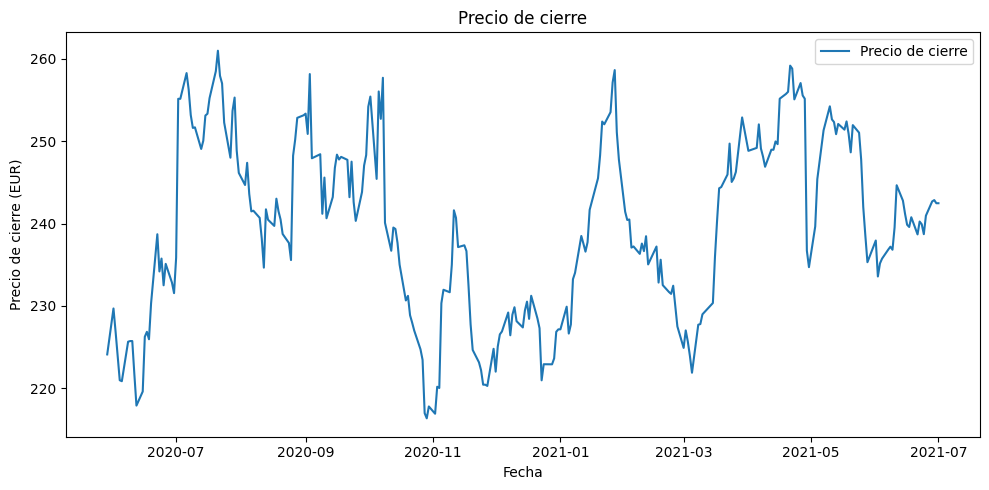

In [26]:
plt.figure(figsize=(10,5))
plt.plot(df_ajustado_interpolado.index, df_ajustado_interpolado['AMGN'], label='Precio de cierre')
plt.title(f'Precio de cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (EUR)')
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
primer_na = df_ajustado_interpolado['DOW'].isna().idxmax()
if pd.isna(df_ajustado_interpolado.loc[primer_na, 'DOW']):
    df_ajustado_sinan = df_ajustado_interpolado.loc[primer_na:].iloc[1:]

In [28]:
df_ajustado_sinan.to_csv('Datos/Transformados/limpio.csv', index=False)